In [42]:
import seaborn as sns
import pandas as pd
import math
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [43]:
df = pd.read_csv('funda-amsterdam.csv')
df.head()

,Unnamed: 0,address,area,bedrooms,postal_code,posting_date,price,property_type,rooms,sale_date,url,year_built
0,0,Knollendamstraat 4 III/IV,108,2,1013 TN,4-6-2016,510000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906
1,1,Moerdijkstraat 47 1,47,1,1079 XM,22-6-2016,215000,apartment,2,5-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1938
2,2,Zeeburgerdijk 349,116,2,1095 AD,9-6-2016,325000,apartment,3,8-7-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,2003
3,3,Brederodestraat 124 -1,58,2,1054 VH,14-5-2016,315000,apartment,3,2-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1910
4,4,Admiraal De Ruijterweg 409 III,63,1,1055 MD,14-6-2016,200000,apartment,3,23-6-2016,http://www.funda.nl/koop/verkocht/amsterdam/ap...,1906


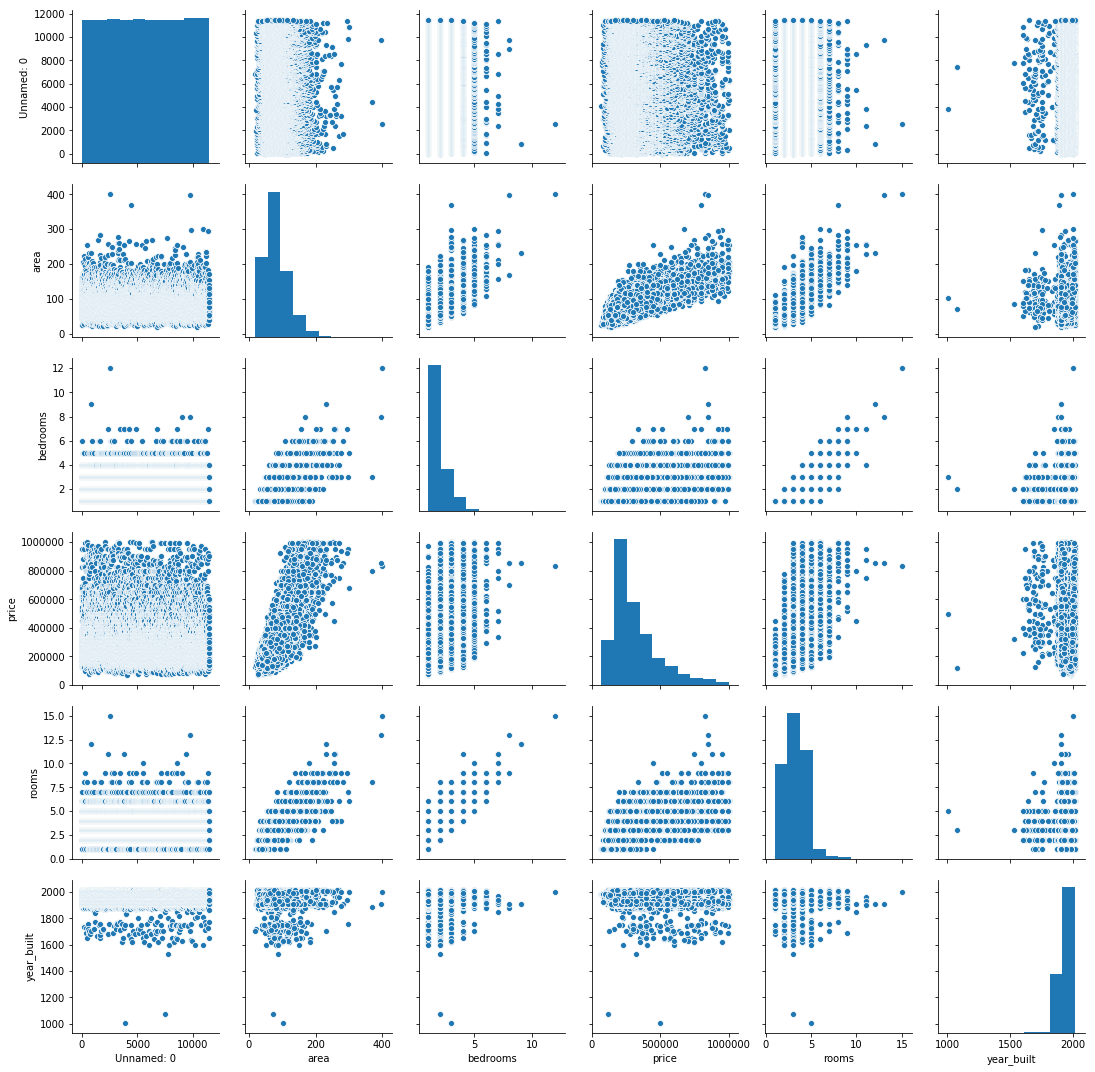

In [44]:
df = df[df['price']> 50000]
sns.pairplot(df)

In [45]:
df_subset = df[['address', 'rooms', 'area', 'price']]
df_subset.head()

,address,rooms,area,price
0,Knollendamstraat 4 III/IV,3,108,510000
1,Moerdijkstraat 47 1,2,47,215000
2,Zeeburgerdijk 349,3,116,325000
3,Brederodestraat 124 -1,3,58,315000
4,Admiraal De Ruijterweg 409 III,3,63,200000


In [46]:
y = df_subset['price']
X = df_subset.loc[:,'rooms':'area']
X.index = df_subset['address']
X.head()

,rooms,area
address,,
Knollendamstraat 4 III/IV,3,108
Moerdijkstraat 47 1,2,47
Zeeburgerdijk 349,3,116
Brederodestraat 124 -1,3,58
Admiraal De Ruijterweg 409 III,3,63


In [47]:
#train, test = train_test_split(df_subset, test_size=0.3, random_state=1)
X_train, X_test, price_train, price_test = train_test_split(X, y, test_size=0.3, random_state=1)
X_train.head()

,rooms,area
address,,
Kolfschotenstraat 68,3,72
Oosteinde 21 Hs,5,148
Amstelvlietstraat 211,4,139
Welnastraat 261,1,28
Nieuwe Nieuwstraat 41,3,59


In [48]:
lm = LinearRegression()
model = lm.fit(X_train, price_train)

In [49]:
coef = pd.DataFrame(X.columns.values, lm.coef_)
coef

,0
-10819.231165,rooms
3782.488742,area


In [50]:
price_p = lm.predict(X_test)
r2_score(price_test, price_p)

0.5326562803746122

In [51]:
math.sqrt(mean_squared_error(price_test, price_p))

117732.43368189757

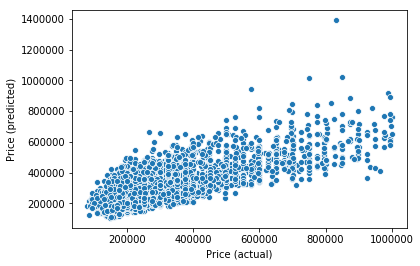

In [52]:
sns.scatterplot(price_test, price_p)
plt.xlabel('Price (actual)')
plt.ylabel('Price (predicted)')
plt.show()